In [1]:
#!/usr/bin/python
%matplotlib inline 

import sys
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../tools/")

# Data Exploration

In [2]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

first_data_item = [v for v in data_dict.values()[:1]]
print '-----------------------------------------'
print 'Data Example: ', (json.dumps(first_data_item, indent=2))

data_points = len(data_dict)
print '-----------------------------------------'
print 'Total number of data points:', data_points
 
# add all features first to list and check the NaNs 
# 'poi' has to be first, because it is the target
features_list = ['poi',
                 'salary', "to_messages", 
    "total_payments",      
    "exercised_stock_options", 
    "bonus", 
    "restricted_stock", 
    "shared_receipt_with_poi", 
    "restricted_stock_deferred", 
    "total_stock_value", 
    "expenses", 
    "loan_advances", 
    "from_messages", 
    "from_this_person_to_poi", 
    "director_fees", 
    "deferred_income", 
    "long_term_incentive", 
    "from_poi_to_this_person"] 


-----------------------------------------
Data Example:  [
  {
    "salary": 365788, 
    "to_messages": 807, 
    "deferral_payments": "NaN", 
    "total_payments": 1061827, 
    "exercised_stock_options": "NaN", 
    "bonus": 600000, 
    "restricted_stock": 585062, 
    "shared_receipt_with_poi": 702, 
    "restricted_stock_deferred": "NaN", 
    "total_stock_value": 585062, 
    "expenses": 94299, 
    "loan_advances": "NaN", 
    "from_messages": 29, 
    "other": 1740, 
    "from_this_person_to_poi": 1, 
    "poi": false, 
    "director_fees": "NaN", 
    "deferred_income": "NaN", 
    "long_term_incentive": "NaN", 
    "email_address": "mark.metts@enron.com", 
    "from_poi_to_this_person": 38
  }
]
-----------------------------------------
Total number of data points: 146


In [3]:
# load data into a dataframe 
df = pd.DataFrame.from_dict(data_dict, orient = 'index')
# replace the NaN for our exploration - undo it for the machine learning part
df = df.replace('NaN', np.nan)
df = df[features_list]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 18 columns):
poi                          146 non-null bool
salary                       95 non-null float64
to_messages                  86 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
from_this_person_to_poi      86 non-null float64
director_fees                17 non-null float64
deferred_income              49 non-null float64
long_term_incentive          66 non-null float64
from_poi_to_this_person      86 non-null float

remove 'restricted_stock_deferred', 'loan_advances'  and 'director_fees' because they have at least 88.7% of NaN values.

In [4]:
features_list.remove('restricted_stock_deferred')
features_list.remove('director_fees')    
features_list.remove('loan_advances')

df = df.drop('restricted_stock_deferred', 1)
df = df.drop('director_fees', 1)
df = df.drop('loan_advances', 1)

print len(features_list)

15


In [5]:
print "Amount of NaN values in the dataset: ", df.isnull().sum().sum()
# Todo compare total and nan

Amount of NaN values in the dataset:  764


In [6]:
poi_to_non_poi = df.poi.value_counts()
poi_to_non_poi.index=['non persons of interest', 'persons of interest']

poi_to_non_poi

non persons of interest    128
persons of interest         18
Name: poi, dtype: int64

### Features

In [7]:
#count NaNs for each row in dataframe
df[df.isnull().sum(axis=1) >= 13]

,poi,salary,to_messages,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,total_stock_value,expenses,from_messages,from_this_person_to_poi,deferred_income,long_term_incentive,from_poi_to_this_person
GRAMM WENDY L,False,NaN,NaN,119292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOCKHART EUGENE E,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
THE TRAVEL AGENCY IN THE PARK,False,NaN,NaN,362096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WODRASKA JOHN,False,NaN,NaN,189583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are four entries that have 13 or more NaN s out of 18. We remove "LOCKHART EUGENE E" because this entry only contains NaNs and we will also remove "THE TRAVEL AGENCY IN THE PARK", because it contains only on entry and is not a person.

In [8]:
df = df.drop('TOTAL')
df = df.drop('LOCKHART EUGENE E')
df = df.drop('THE TRAVEL AGENCY IN THE PARK')

data_dict.pop('TOTAL', 0)
data_dict.pop('LOCKHART EUGENE E', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

### Identifying outliers

              Bonus       Salaray
count  8.100000e+01  9.400000e+01
mean   1.201773e+06  2.840875e+05
std    1.441679e+06  1.771311e+05
min    7.000000e+04  4.770000e+02
25%             NaN           NaN
50%             NaN           NaN
75%             NaN           NaN
max    8.000000e+06  1.111258e+06
                       salary      bonus
SKILLING JEFFREY K  1111258.0  5600000.0
LAY KENNETH L       1072321.0  7000000.0
FREVERT MARK A      1060932.0  2000000.0
PICKERING MARK R     655037.0   300000.0
WHALLEY LAWRENCE G   510364.0  3000000.0
                       salary      bonus
LAVORATO JOHN J      339288.0  8000000.0
LAY KENNETH L       1072321.0  7000000.0
SKILLING JEFFREY K  1111258.0  5600000.0
BELDEN TIMOTHY N     213999.0  5249999.0
ALLEN PHILLIP K      201955.0  4175000.0
KITCHEN LOUISE       271442.0  3100000.0
DELAINEY DAVID W     365163.0  3000000.0
WHALLEY LAWRENCE G   510364.0  3000000.0
MCMAHON JEFFREY      370448.0  2600000.0
FALLON JAMES B       304588.0  2500000

/Users/barbara/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


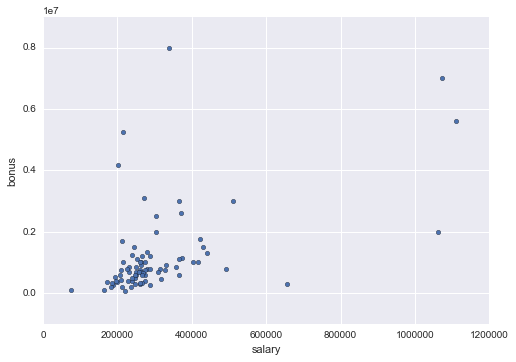

In [9]:
#data_dict.pop("TOTAL", 0) 
#df = df.drop('TOTAL')
money_df = pd.DataFrame({"Salaray": df['salary'],
                          "Bonus": df['bonus']})
print money_df.describe()

new = df.filter(['salary','bonus'], axis=1)

print new.nlargest(5, 'salary')
print new.nlargest(10, 'bonus')

df.plot.scatter('salary', 'bonus')

There is a data point far far away from the others. As the name of this datapoint is "Total " it is clear that this is an outlier due to a spreadsheet error. We will remove this datapoint and take a closer look.

After removing the spreadsheet error, we can identify some outliers in the salary. SKILLING JEFFREY K, LAY KENNETH L and FREVERT MARK A had a salary over 1.000.000 each. The highest Bonus had LAVORATO JOHN J. There are some more outliers, but we want to keep this data for our analysis, because those are more likely to be anomalies than outliers.

# Optimize Feature Selection

### Create new features

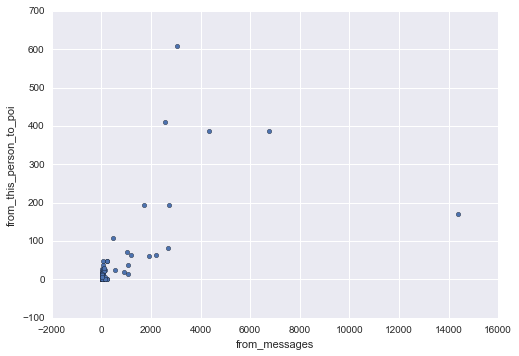

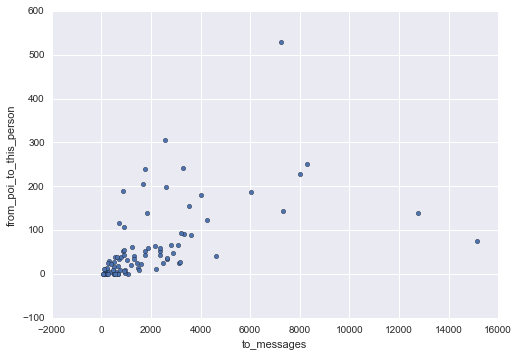

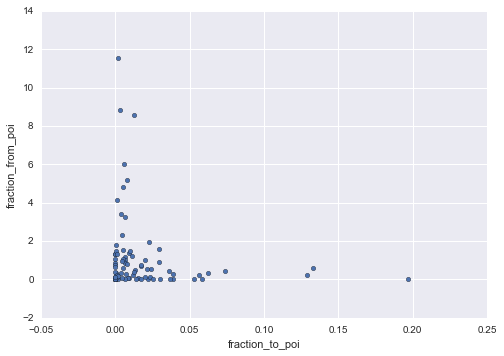

In [10]:
# dataframe
df['fraction_to_poi'] = df['from_this_person_to_poi'] / df['to_messages']
df['fraction_from_poi'] = df['from_poi_to_this_person'] / df['from_messages']

df.plot.scatter('from_messages', 'from_this_person_to_poi')
df.plot.scatter('to_messages', 'from_poi_to_this_person')

#plot new features
df.plot.scatter('fraction_to_poi', 'fraction_from_poi')  

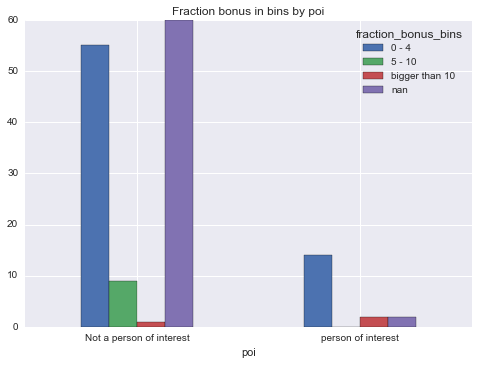

In [12]:
# bonus to total_payments
df['fraction_bonus'] = df['total_payments'] / df['bonus']

# add a new column with bins for fraction bonus
def get_fraction_bonus_bins(fraction_bonus):
    fraction_bonus_bins = fraction_bonus
    if fraction_bonus > 4 and fraction_bonus <= 10:
        return '5 - 10'
    elif fraction_bonus > 0 and fraction_bonus < 5:
        return '0 - 4'
    elif fraction_bonus > 10:
        return 'bigger than 10'
    else:
        return 'nan'

df['fraction_bonus_bins'] = df['fraction_bonus'].apply(get_fraction_bonus_bins)

df.groupby('poi')['fraction_bonus_bins'].value_counts().unstack().plot(kind = 'bar')
plt.xticks([0, 1], ['Not a person of interest', 'person of interest'], rotation = 0)
plt.title('Fraction bonus in bins by poi')

In [11]:
# once again  - create new features and add them to the data dict:
for k in data_dict.keys():
    data_dict[k]['ratio_from_poi'] = 0
    if (data_dict[k]['from_poi_to_this_person'] != 'NaN') and (data_dict[k]['from_messages'] != 'NaN') and (data_dict[k]['from_messages'] != 0):
        data_dict[k]['ratio_from_poi'] = float(data_dict[k]['from_poi_to_this_person'])/float(data_dict[k]['from_messages'])
features_list.append('ratio_from_poi')

for k in data_dict.keys():
    data_dict[k]['ratio_to_poi'] = 0
    if (data_dict[k]['from_this_person_to_poi'] != 'NaN') and (data_dict[k]['to_messages'] != 'NaN') and (data_dict[k]['to_messages'] != 0):
        data_dict[k]['ratio_to_poi'] = float(data_dict[k]['from_this_person_to_poi'])/float(data_dict[k]['to_messages'])
features_list.append('ratio_to_poi')


for k in data_dict.keys():
    data_dict[k]['ratio_bonus'] = 0
    if (data_dict[k]['total_payments'] != 'NaN') and (data_dict[k]['bonus'] != 'NaN') and (data_dict[k]['bonus'] != 0):
        data_dict[k]['ratio_bonus'] = float(data_dict[k]['total_payments'])/float(data_dict[k]['bonus'])
features_list.append('ratio_bonus')


### update feature_list 
features_list.append('ratio_from_poi')
features_list.append('ratio_to_poi')
features_list.append('ratio_bonus')

In [12]:
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

my_dataset = data_dict  

# Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

/Users/barbara/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Select Features

In [14]:
from sklearn.feature_selection import SelectKBest
# Univariate feature selection

k_best = SelectKBest(k=7)
k_best.fit(features, labels)
scores = k_best.scores_
unsorted_pairs = zip(features_list[1:], scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))

print 'Select KBest', sorted_pairs

Select KBest [('exercised_stock_options', 24.815079733218194), ('total_stock_value', 24.182898678566879), ('bonus', 20.792252047181535), ('salary', 18.289684043404513), ('deferred_income', 11.458476579280369), ('long_term_incentive', 9.9221860131898225), ('restricted_stock', 9.2128106219771002), ('total_payments', 8.7727777300916792), ('shared_receipt_with_poi', 8.589420731682381), ('expenses', 6.0941733106389453), ('from_poi_to_this_person', 5.2434497133749582), ('ratio_from_poi', 5.123946152756889), ('ratio_from_poi', 5.123946152756889), ('ratio_bonus', 4.4527162100462689), ('ratio_bonus', 4.4527162100462689), ('ratio_to_poi', 4.09465330957695), ('ratio_to_poi', 4.09465330957695), ('from_this_person_to_poi', 2.3826121082276739), ('to_messages', 1.6463411294420076), ('from_messages', 0.16970094762175533)]


### Principle Component Analysis

For selecting Features PCA is better, because it takes the features and creates new ones superior to original attributes.

Principal Component of a dataset is the direction that has the largest variance*, because it retains the max amoutn of information of the original data. 

Systematized way to transform input features into principle components
Use principal components as new features
PCs are directions in data that maximize variance (minimize information loss) whe you project/compress down onto them. More variance of data along a PC, higher that PC is ranked
Most variance/most information -> first PC
Second most variance (without overlapping w/ first PC) -> second PC
Max no. of Pcs = no. of input features

We want to use PCA when latent features driving the patterns in data
We need dimensionality reduction for visualizing high-dimensional data, reduce noise and
make other algorithms (regression, classification) work better we fewer inputs 

*Variance: "spread of data distribution" -> similar to standard deviation

In [15]:
from sklearn.decomposition import PCA

def doPCA():
    pca = PCA(n_components=8)
    pca.fit(data)
    return pca

pca = doPCA()
print pca.explained_variance_ratio_

[  8.02257982e-01   1.67012744e-01   1.89157980e-02   7.59919360e-03
   2.31634112e-03   1.70785314e-03   1.17044849e-04   6.12535420e-05]


# Pick and Tune an Algorithm

Naive Baies

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb = GaussianNB()
pca = doPCA()
clf = Pipeline(steps=[('pca', pca), ('nb', nb)])

test_classifier(clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('nb', GaussianNB(priors=None))])
	Accuracy: 0.85653	Precision: 0.45498	Recall: 0.38400	F1: 0.41649	F2: 0.39637
	Total predictions: 15000	True positives:  768	False positives:  920	False negatives: 1232	True negatives: 12080



In [ ]:
SVM

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

svc = SVC(kernel="linear")
pca = doPCA()

clf = Pipeline(steps=[('pca', pca), ('scale', StandardScaler()), ('svc', svc)])

test_classifier(clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.85807	Precision: 0.36864	Recall: 0.09050	F1: 0.14532	F2: 0.10658
	Total predictions: 15000	True positives:  181	False positives:  310	False negatives: 1819	True negatives: 12690



In [ ]:
Knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
pca = doPCA()

clf = Pipeline(steps=[('pca', pca), ('scale', StandardScaler()), ('knn', knn)])

test_classifier(clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])
	Accuracy: 0.86080	Precision: 0.13934	Recall: 0.00850	F1: 0.01602	F2: 0.01047
	Total predictions: 15000	True positives:   17	False positives:  105	False negatives: 1983	True negatives: 12895



In [ ]:
DecisionTree

In [22]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
pca = doPCA()

clf = Pipeline(steps=[('pca', pca), ('dt', dt)])

test_classifier(clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
	Accuracy: 0.79567	Precision: 0.24631	Recall: 0.25850	F1: 0.25226	F2: 0.25597
	Total predictions: 15000	True positives:  517	False positives: 1582	False negatives: 1483	True negatives: 11418



In [ ]:
Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
pca = doPCA()

clf = Pipeline(steps=[('pca', pca), ('scale', StandardScaler()), ('rf', rf)])

test_classifier(clf, my_dataset, features_list)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            ma...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])
	Accuracy: 0.85240	Precision: 0.36352	Recall: 0.14250	F1: 0.20474	F2: 0.16223
	Total predictions: 15000	True positives:  285	False positives:  499	False negatives: 1715	True negatives: 12501



## Tune the algorithm 

GridSearchCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. The beauty is that it can work through many combinations in only a couple extra lines of code.

We want to tune the DecisionTree algorithm and try to achieve better scores.

In [61]:
from sklearn.model_selection import GridSearchCV

dt = tree.DecisionTreeClassifier()
pca = PCA()

pipe = Pipeline([('pca', pca), ('dt', dt)])
parameters = dict(pca__n_components=[3, 5, 8], 
                  pca__svd_solver=['full', 'auto'],
                  dt__criterion=['gini', 'entropy'],
                  dt__splitter=['best', 'random'],
                  dt__min_samples_split=[20, 50, 100],
                  dt__random_state=[100, 200]
                 )
            
clf = GridSearchCV(pipe, parameters)
clf = clf.fit(features, labels)

test_classifier(clf, my_dataset, features_list)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'dt__criterion': ['gini', 'entropy'], 'dt__splitter': ['best', 'random'], 'pca__n_components': [3, 5, 8], 'pca__svd_solver': ['full', 'auto'], 'dt__min_samples_split': [20, 50, 100], 'dt__random_state': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
	Accuracy: 0.85753	Precision: 0.40200	Recall: 0.14050	F1: 0.20823	F2: 0.16151
	Total predictions: 15000	True positives:  281	

In [62]:
dump_classifier_and_data(clf, my_dataset, features_list)

# Validate and Evaluate
Validation is important because it gives an estimate of the performance of an independent dataset and serves as a check for overfitting.

## Evaluation Metrics

### Recall.

true positives / true positives + false negatives

good recall:
Whenever the target (in our case POI) shows up in the data set, we can identify it almost every time. he cost of this is that we sometimes get some false positives.

### Precision.
true positives / true positives + false positives

good precision: 
Whenever the target (in our case POI) gets flagged in the data set, it is very likely to be a real target and not a false alarm. 

###  F1 score.
This score is a measure of a test's accuracy. It considers recall and precision.

good f1 score:
This is the best of both worlds. Both my false positive and false negative rates are low.

## Validation Strategy

In [63]:
from sklearn import cross_validation

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(
    features, labels, test_size=0.4, random_state=0)

clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)

0.862068965517


### References

http://scikit-learn.org

http://maciejjaskowski.github.io/2016/01/22/pandas-scikit-workflow.html

http://machinelearningmastery.com/feature-selection-machine-learning-python/

https://en.wikipedia.org/wiki/F1_score

https://discussions.udacity.com/t/errors-when-using-selectkbest-in-final-project/170706/6
